In [2]:
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
y_encpded = to_categorical(y, num_classes=3)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y_encpded, test_size=0.2, random_state=42)

In [9]:
def build_model(activation):
    model = Sequential([Dense(10, activation=activation, input_shape=(4,)),Dense(3, activation="softmax")])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
activation = ["relu", "sigmoid", "tanh"]
histories = {}

In [13]:
for act in activation:
    model = build_model(act)
    print(f"Traning with activation; {act}")
    history = model.fit(X_train, y_train, epochs=10)
    histories[act] = history.history["loss"]

Traning with activation; relu
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3075 - loss: 1.3800  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3650 - loss: 1.2817 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3692 - loss: 1.2508
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3504 - loss: 1.2271 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3681 - loss: 1.1904 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3546 - loss: 1.1876 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3296 - loss: 1.1440 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3542 - loss: 1.1292 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3892 - loss: 1.0863 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4119 - loss: 1.0958 
Traning with activation; sigmoid
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3367 - loss: 1.1045  
Epoch 2/10
4/4 ━━━━━━

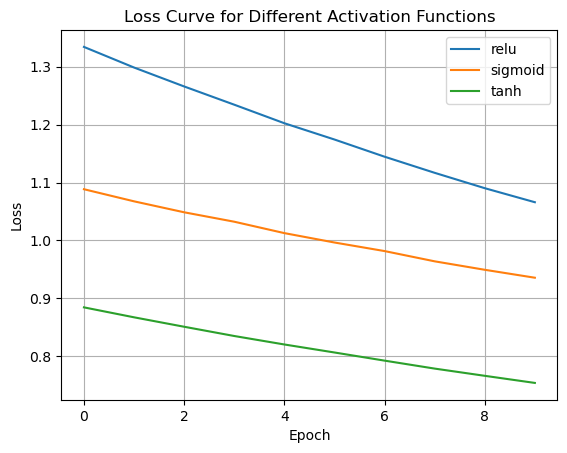

In [14]:
for act in activation:
    plt.plot(histories[act], label=f'{act}')
plt.title('Loss Curve for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()